# 第30讲：随机过程描述与统计检验

随机过程数学描述

关于随机过程的数学描述，需要了解的概念有：
        
* 随机事件
* 随机过程
* 离散型随机变量和连续性随机变量
* 随机数生成器
* 随机变量的概率密度函数(PDF)
* 随机变量的概率分布函数(CDF),它是PDF的累计积分。如果将X看成是数轴上的随机点的坐标，那么分布函数F(x)在x处的函数值就表示X落在区间(-∞,x)上的概率。
* 随机变量抽样
* 随机变量抽样数据直方图
* 随机变量抽样数据统计特征检验等。
* scipy.stats模块包含随机过程统计工具和随机过程的概率描述。
* numpy.random模块包含有多个随机数生成器。

随机变量分布

常用连续随机变量分布
1. 均匀分布 
2. 标准正态分布
3. 正态分布
4. 指数分布
5. 瑞利分布
6. 凯方(c2)分布
7. 贝塔分布
8.伽马分布
9. 对数正态分布
10. t 分布
11. F分布
12. 柯西分布
13. 威布尔分布

常用离散随机变量分布
1.  二项式分布
2.  泊松分布
3.  几何分布
4.  负二项分布
5.  单点分布
6.  对数分布
7.  超几何分布

抽取随机变量2000个数据、画统计直方图、做正态分布概率密度函数拟合编程示例：
1.  由numpy包的正态分布随机数生成器函数np.random.normal抽取2000个随机数a
2.  选定盒子bins=np.array([-4.5,3.5,...]),binszx=(bins[1:]+bins[:-1])/2
3.  调用np.histogram(a, bins=bins)[0]统计出落在各盒子中的频次再由scipy.stats.norm.pdf(binszx)计算出各盒子中心位置处的正态分布概率值放大2000成为频次与 a对比
4.  对a做正态分布拟合，计算出正态分布随机变量的均值mean 和标准差std.
所需程序 statsf.py如下：


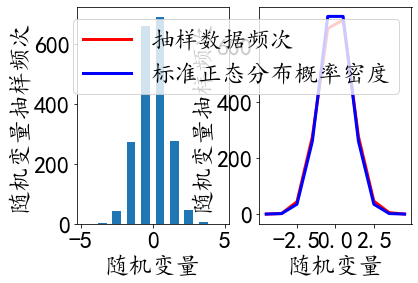

mean= 0.004191290138949458
std= 1.0061747717996492


In [1]:
#encoding=gb2312
from scipy import stats as st
import pylab as pl
npp=pl.np
n=2000;pl.close()
a = npp.random.normal(size=n)
bins = npp.arange(-5, 6)
pc = npp.histogram(a, bins=bins)[0]
binszx = 0.5*(bins[1:] + bins[:-1])
pl.rcParams['font.size']=24
pl.rcParams['font.sans-serif']=['KaiTi']
pl.rcParams['axes.unicode_minus']=False
pl.subplot(121)
pl.bar(binszx,pc,width=0.6)
pl.xlabel('随机变量');pl.ylabel('随机变量抽样频次')
b = n*st.norm.pdf(binszx)# norm.pdf 是标准正态概率密度
pl.subplot(122)
pl.plot(binszx, pc,'r-',binszx, b,'b-',lw=3)
pl.legend(['抽样数据频次','标准正态分布概率密度'])
pl.xlabel('随机变量');pl.ylabel('随机变量抽样频次')
pl.show()
loc,std = st.norm.fit(a)#由抽样数据拟合正态分布指标
print('mean=',loc)
print('std=',std)

## 统计检验

统计检验是一个决策指示器。例如，如果我们有两组观察值，我们假设它们来自于高斯过程（即正态分布），我们可以用T检验来决定这两组观察值是不是显著不同。

T 统计值：一个值，符号与两个随机过程的差异成比例，大小与差异的程度有关。
p 值：两个过程相同的概率。如果它接近1，那么这两个过程几乎肯定是相同的。

In [5]:
from scipy import stats as st
import numpy as np
np.random.seed(12345678) # fix random seed to get same numbers
rvs1 = st.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (st.norm.rvs(loc=5,scale=10,size=500) +st.norm.rvs(scale=0.2,size=500))
st.ttest_rel(rvs1,rvs2)

Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)

In [6]:
st.ttest_ind(rvs1,rvs2)

Ttest_indResult(statistic=0.25921662934183143, pvalue=0.7955215584878815)

In [7]:
rvs3 = (st.norm.rvs(loc=8,scale=10,size=500) +st.norm.rvs(scale=0.2,size=500))
st.ttest_rel(rvs1,rvs3)

Ttest_relResult(statistic=-3.9995108708727924, pvalue=7.308240219166128e-05)

In [9]:
st.ttest_ind(rvs1,rvs3)

Ttest_indResult(statistic=-3.8888907106487216, pvalue=0.00010736782006652082)